In [57]:
import os

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np

In [59]:
import sys
print(sys.executable)

d:\NLP\NLP Projects\Churn-Prediction\conda\churn-env\python.exe


In [60]:
df=pd.read_csv("ecommerce_customer_churn_dataset.csv")

In [61]:
df.head(5)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [63]:
df.shape

(50000, 25)

In [64]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

Information about columns used in the data sets:


Few general observations:
There are few missing values observed in the data, we will so analysis column wise

In [65]:
df.duplicated().sum()  # there is no duplicated rows in the datasets

np.int64(0)

## AGE


In [66]:
df['Age'].value_counts()

Age
18.0     2639
38.0     1638
37.0     1627
40.0     1570
39.0     1564
         ... 
5.0        16
10.0       14
74.0       11
200.0      11
150.0       9
Name: count, Length: 62, dtype: int64

In [67]:
df['Age'].isnull().sum()

np.int64(2495)

Observation in the AGE column:  

-- There are 2495 rows missing in the age column  

-- we may fill those missing values with the median column  

-- The distrubution looks nearly normal, even the log transformed also looks nearly normal so lets keep the actual age  

-- Median age of the people is around 35-38 years depending on the different country  

-- Most of the customer are from the age 25-50(comparitevely youger people)  

-- The youner gen is more likely to churn as per the data observation (may be pricing related issue)  

-- All the age group has similar life time value


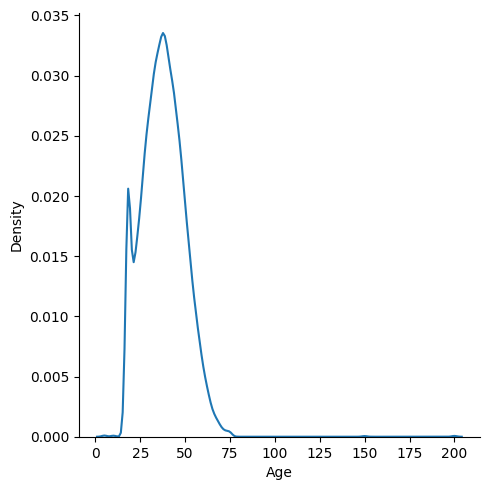

In [68]:
sns.displot(data=df,x=df['Age'],kind='kde')

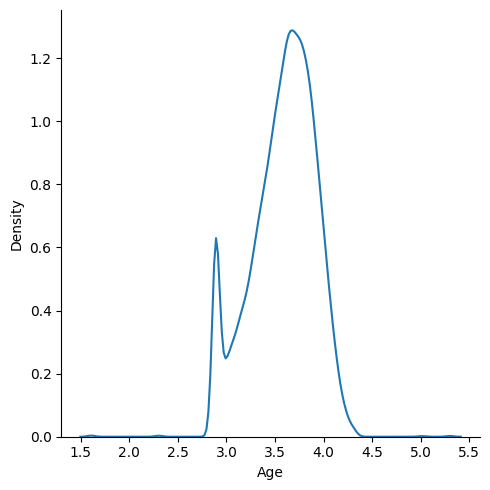

In [69]:
sns.displot(data=df,x=np.log(df['Age']),kind='kde')

In [70]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [112]:
df['Age'].isnull().sum() # Now there is no missing value

np.int64(0)

In [72]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [73]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce').astype('Int32')

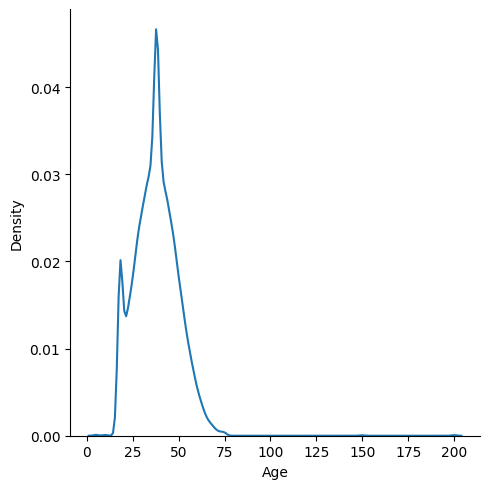

In [74]:
sns.displot(data=df,x=df['Age'],kind='kde')

In [75]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

In [76]:
print(df.groupby("Gender")[['Age']].mean())

              Age
Gender           
Female   37.82326
Male    37.802397
Other   37.798292


In [77]:
print(df.groupby("Gender")[['Age']].median())

         Age
Gender      
Female  38.0
Male    38.0
Other   38.0


In [78]:
print(df.groupby(["Gender","Country"])[['Age']].median())

                   Age
Gender Country        
Female Australia  38.0
       Canada     38.0
       France     38.0
       Germany    38.0
       India      38.0
       Japan      38.0
       UK         38.0
       USA        38.0
Male   Australia  38.0
       Canada     38.0
       France     38.0
       Germany    38.0
       India      38.0
       Japan      38.0
       UK         38.0
       USA        38.0
Other  Australia  38.0
       Canada     38.0
       France     39.0
       Germany    38.0
       India      38.0
       Japan      38.0
       UK         38.0
       USA        37.0


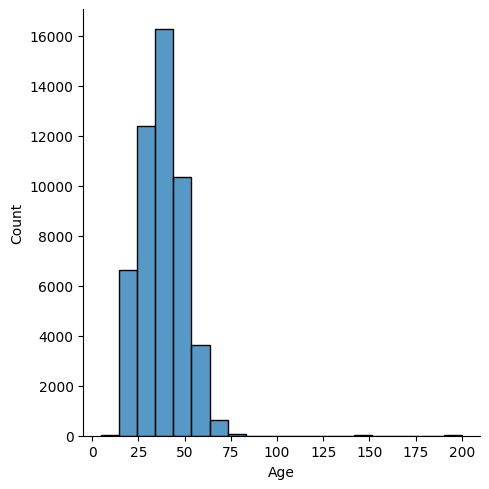

In [79]:
sns.displot(data=df, x='Age', kind='hist',bins=20) # Most customers are from which age group?


In [80]:
df['Age_group']=df['Age'].apply(lambda x: "young" if x<25 else "Middle" if 25<x<=55 else "Senior")

In [81]:
print(df.groupby("Age_group")['Churned'].mean())  # which age group is more likely to churn

Age_group
Middle    0.259003
Senior    0.258663
young     0.484176
Name: Churned, dtype: float64


In [82]:
print(df.groupby(["Age_group","Country"])['Churned'].mean())  # which age group is more likely to churn country wise

Age_group  Country  
Middle     Australia    0.263326
           Canada       0.265836
           France       0.241086
           Germany      0.253704
           India        0.260712
           Japan        0.253656
           UK           0.254707
           USA          0.263593
Senior     Australia    0.290230
           Canada       0.255578
           France       0.258258
           Germany      0.280303
           India        0.270769
           Japan        0.239437
           UK           0.257895
           USA          0.246479
young      Australia    0.496552
           Canada       0.482368
           France       0.479452
           Germany      0.488270
           India        0.491917
           Japan        0.440341
           UK           0.499016
           USA          0.480209
Name: Churned, dtype: float64


In [83]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group'],
      dtype='object')

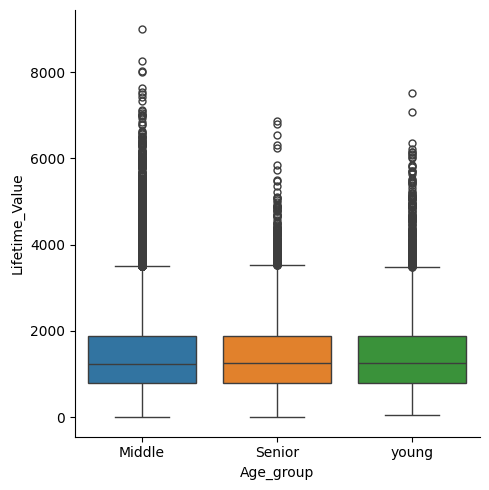

In [84]:
sns.catplot(data=df,x="Age_group",y='Lifetime_Value',kind='box',hue="Age_group") # Which age group provides higher life time value

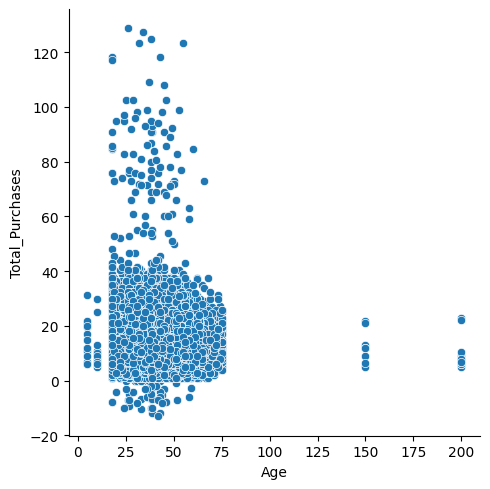

In [85]:
sns.relplot(data=df,x="Age",y="Total_Purchases",kind='scatter')

In [86]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Age_group
0,43,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1,Middle
1,36,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4,Middle
2,45,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4,Middle
3,56,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1,Senior
4,35,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4,Middle


## Gender

Almost equal number of male and female  
all genders has almost equal churn rate
Gender is categorical variable need to perforn one hot encoding

In [87]:
df['Gender'].value_counts()

Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64

In [88]:
df['Gender'].isnull().sum() # No null values observed in the Gender column

np.int64(0)

In [89]:
df.groupby("Gender")['Churned'].mean() 

Gender
Female    0.289736
Male      0.287301
Other     0.312700
Name: Churned, dtype: float64

In [90]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [91]:
df.head()

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Age_group,Gender_Male,Gender_Other
0,43,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,...,16.3,20.8,1.0,953.33,2278.0,0,Q1,Middle,True,False
1,36,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,...,NaN,23.3,3.0,1067.47,3028.0,0,Q4,Middle,True,False
2,45,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,...,NaN,8.8,NaN,1289.75,2317.0,0,Q4,Middle,False,False
3,56,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,...,85.9,31.0,3.0,2340.92,2674.0,0,Q1,Senior,False,False
4,35,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,32.5,...,83.0,50.4,4.0,3041.29,5354.0,0,Q4,Middle,True,False


## Country

It is observed that most customer from USA or may be most data taken from USA

In [92]:
df['Country'].value_counts() 

Country
USA          17384
UK            7534
Canada        6023
Germany       4925
Australia     4061
France        4013
India         3512
Japan         2548
Name: count, dtype: int64

In [93]:
df['Country'].isnull().sum() # No null value about the country

np.int64(0)

In [94]:
df=pd.get_dummies(df,columns=['Country'],drop_first=True) # Categorical column to one hot encoding

In [95]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Membership Years

No null values observed, almost normally distributed 

In [96]:
df['Membership_Years']

0         2.9
1         1.6
2         2.9
3         2.6
4         3.1
         ... 
49995    10.0
49996     1.4
49997     2.8
49998     2.9
49999     2.2
Name: Membership_Years, Length: 50000, dtype: float64

In [97]:
df['Membership_Years'].isnull().sum() # No null values 

np.int64(0)

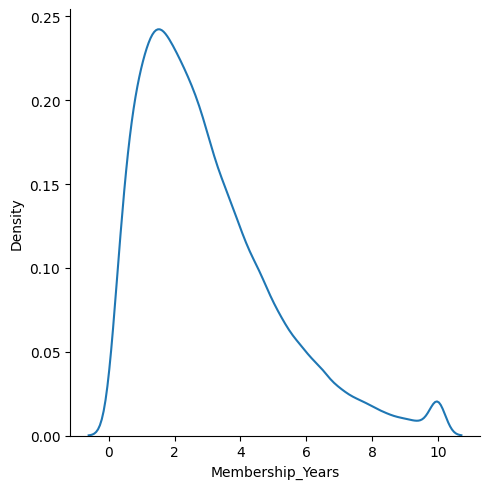

In [98]:
sns.displot(data=df,x='Membership_Years',kind='kde')

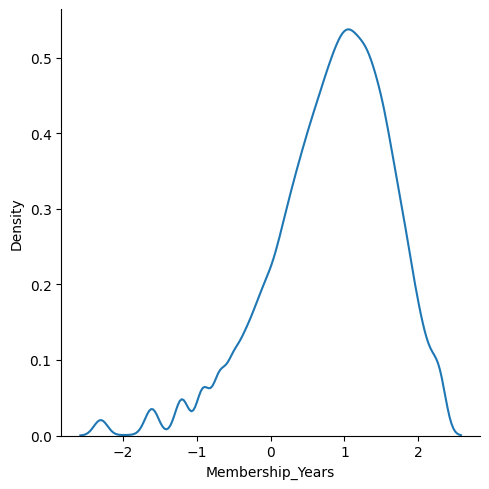

In [99]:
sns.displot(data=df,x=np.log(df['Membership_Years']),kind='kde')

In [100]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## City

The number of cities are more so ignoring this to take into our model

In [101]:
df['City'].nunique() # there are 40 unique cities

40

## Login frequency

Here also no null values are observed  
The log transformed column looks more normally distributed

In [102]:
df['Login_Frequency'].isnull().sum() # no null values found here

np.int64(0)

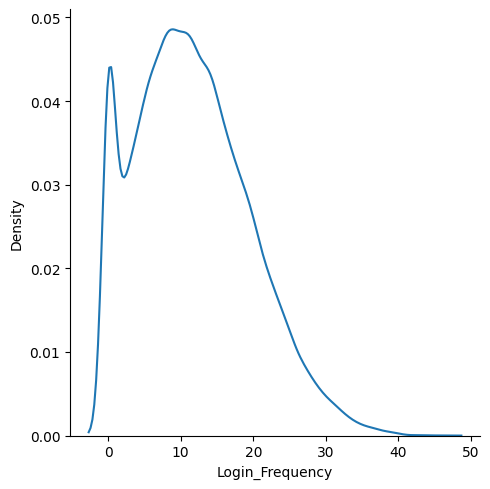

In [103]:
sns.displot(data=df,x=df['Login_Frequency'],kind='kde')

d:\NLP\NLP Projects\Churn-Prediction\conda\churn-env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


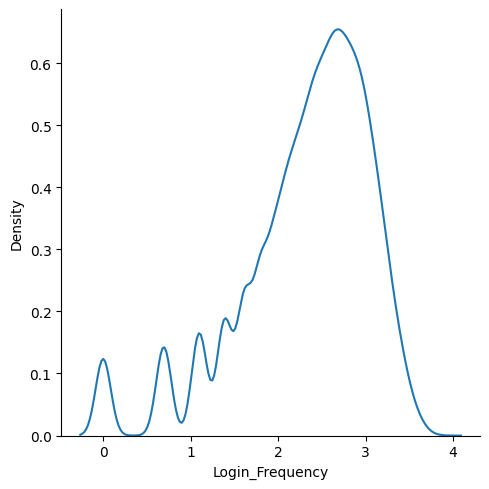

In [104]:
sns.displot(data=df,x=np.log(df['Login_Frequency']),kind='kde')

In [105]:
df.groupby('Age_group')[['Login_Frequency']].mean() # Almost same login frequency of different age group

,Login_Frequency
Age_group,
Middle,11.599771
Senior,11.597853
young,11.787611


In [106]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Session duration avg

Filled missing values with the mean  
almost looks like normally distributed  


In [107]:
df['Session_Duration_Avg'].isnull().sum() # Some null values observed

np.int64(3399)

In [108]:
df['Session_Duration_Avg']=df['Session_Duration_Avg'].fillna(df['Session_Duration_Avg'].mean())

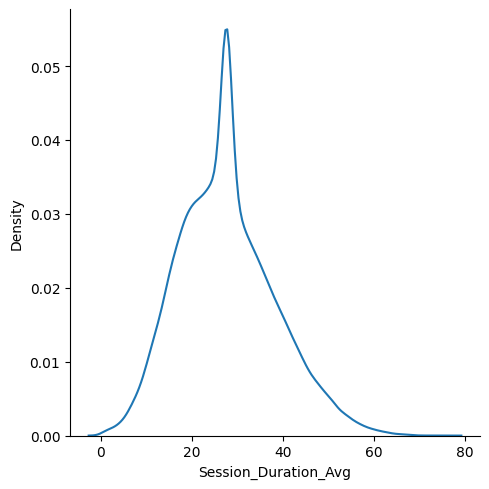

In [109]:
sns.displot(data=df,x=df['Session_Duration_Avg'],kind='kde')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  Int32  
 1   City                           50000 non-null  object 
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  float64
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              47000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 46000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       47000 non-null  float64
 11  Discount_Usage_Rate            46500 non-null  float64
 12  Returns_Rate                   45509 non-null 

In [111]:
df.columns

Index(['Age', 'City', 'Membership_Years', 'Login_Frequency',
       'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate',
       'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value',
       'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter', 'Age_group', 'Gender_Male', 'Gender_Other',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_UK', 'Country_USA'],
      dtype='object')

## Page per session

In [113]:
df['Pages_Per_Session'].isnull().sum()

np.int64(3000)